# Exploratory Data Analysis: Biomedical Text Classification

This notebook explores the cleaned biomedical abstracts dataset with extracted categories.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import itertools
from pprint import pprint

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

## 1. Load and Explore the Data

In [113]:
# Load the dataset with categories
df = pd.read_csv('preprocessing/abstracts_with_categories.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.sample(15)

Dataset shape: (1000, 12)
Columns: ['PMID', 'Title', 'Abstract', 'Journal', 'Year', 'Authors', 'Cleaned_Abstract', 'Categories', 'Research_Type', 'Trial_Phase', 'Diseases', 'Chemicals']


,PMID,Title,Abstract,Journal,Year,Authors,Cleaned_Abstract,Categories,Research_Type,Trial_Phase,Diseases,Chemicals
695,40560615,Fluid dynamics model of the cerebral ventricular system.,"Hydrocephalus, a neurological condition characterized by an excessive buildup of cerebrospinal f...",Proceedings of the National Academy of Sciences of the United States of America,2025.0,Haritosh Patel; Yu Xuan Huang; Duygu Dengiz; Mariya Pravdivtseva; Olav Jansen; Eckhard Quandt; J...,hydrocephalus neurological condition characterize excessive buildup cerebrospinal fluid csf brai...,Hydrocephalus; obstructions; hydrocephalus; shunt occlusion; hydrocephalus,NaN,NaN,Hydrocephalus; obstructions; hydrocephalus; shunt occlusion; hydrocephalus,NaN
899,40555075,An anxiety screening framework integrating multimodal data and graph node correlation.,"Anxiety disorders are a significant global health concern, profoundly impacting patients' lives ...",Artificial intelligence in medicine,2025.0,Haimiao Mo; Hongjia Wu; Qian Rong; Zhijian Hu; Meng Yi; Peipei Chen,anxiety disorder significant global health concern profoundly impact patient life social functio...,Anxiety; anxiety; anxiety; anxiety; anxiety,NaN,NaN,Anxiety; anxiety; anxiety; anxiety; anxiety,NaN
790,40557249,"The Effectiveness of Low-Level LED Light Therapy for Sleep Problems, Psychological Symptoms, and...","<b>Background:</b> Shift-work schedules can cause sleep and psychological problems among nurses,...",Journal of nursing management,2025.0,Yung-Hsuan Liao; Chen-Jei Tai; Jin-Lain Ming; Li-Hwa Lin; Li-Yin Chien,< b > background:</b > shift work schedule cause sleep psychological problem nurse negatively af...,insomnia; Depression; Insomnia; insomnia; depression; anxiety; insomnia; depression; anxiety; cl...,clinical_trial,NaN,insomnia; Depression; Insomnia; insomnia; depression; anxiety; insomnia; depression; anxiety,NaN
364,40566654,Components of frontal assessment battery and clinical features in patients with stroke.,"First, to investigate whether the 6 aspects of executive functions assessed by the Frontal Asses...",Journal of rehabilitation medicine,2025.0,Katsuya Sakai; Yuichiro Hosoi; Yusuke Harada; Yuichi Kato; Takayuki Miyauchi,investigate 6 aspect executive function assess frontal assessment battery different component ex...,stroke; stroke; executive dysfunction; extract; observational,observational,NaN,stroke; stroke; executive dysfunction,extract
960,40553290,An In Vivo Model of Recurrent Glioblastoma.,Glioblastoma (GBM) is a highly aggressive and prevalent adult brain tumor. Despite an intensive ...,"Methods in molecular biology (Clifton, N.J.)",2025.0,Muhammad Vaseem Shaikh; Benjamin Brakel; Alisha Anand; Chitra Venugopal; Sheila K Singh,glioblastoma gbm highly aggressive prevalent adult brain tumor despite intensive standard care c...,Glioblastoma; tumor; tumor; temozolomide; temozolomide,NaN,NaN,Glioblastoma; tumor; tumor,temozolomide; temozolomide
973,40553275,Synergy Assay for Screening Small Molecule Combinations in Brain Cancer Stem Cells.,Brain tumors are among the most heterogeneous tumors characterized. This heterogeneity drives re...,"Methods in molecular biology (Clifton, N.J.)",2025.0,Benjamin Brakel; Iqra Chaudhry; Chitra Venugopal; Sheila K Singh,brain tumor heterogeneous tumor characterize heterogeneity drive resistance single drug therapy ...,Brain tumors; tumors,NaN,NaN,Brain tumors; tumors,NaN
523,40564183,Next-Generation Drug Delivery for Neurotherapeutics: The Promise of Stimuli-Triggered Nanocarriers.,Nanotherapeutics have emerged as novel unparalleled drug delivery systems (DDSs) for the treatme...,Biomedicines,2025.0,Radka Boyuklieva; Nikolay Zahariev; Plamen Simeonov; Dimitar Penkov; Plamen Katsarov,nanotherapeutic emerge novel unparalleled drug delivery system dds treatment neurodegenerative d...,neurodegenerative disorders; toxicity; Alzheimer's and Parkinson's disease; review,review,NaN,neurodegenerative disorders; toxicity; Alzheimer's and Parkinson

In [114]:
# Basic info about the dataset
print("Dataset Info:")
print(f"Total abstracts: {len(df)}")
print(f"Abstracts with categories: {df['Categories'].notna().sum()}")
print(f"Abstracts with research types: {df['Research_Type'].notna().sum()}")
print(f"Abstracts with trial phases: {df['Trial_Phase'].notna().sum()}")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
Total abstracts: 1000
Abstracts with categories: 987
Abstracts with research types: 438
Abstracts with trial phases: 4

Missing values:
PMID                  0
Title                 0
Abstract              0
Journal               0
Year                  5
Authors               0
Cleaned_Abstract      0
Categories           13
Research_Type       562
Trial_Phase         996
Diseases             31
Chemicals           445
dtype: int64


In [115]:
# Find rows where Categories is missing (NaN) or an empty string after stripping
empty_categories = df[df['Categories'].isnull() | (df['Categories'].str.strip() == '')]
print(f"Number of abstracts with empty Categories: {len(empty_categories)}")
display(empty_categories) 

Number of abstracts with empty Categories: 13


,PMID,Title,Abstract,Journal,Year,Authors,Cleaned_Abstract,Categories,Research_Type,Trial_Phase,Diseases,Chemicals
21,40575103,Leveraging Random Forests explainability for predictive modeling of children's conduct problems:...,"Conduct problems are among the most complex, impairing, and prevalent challenges affecting the m...",Frontiers in public health,2025.0,Estrella Romero; Jaime González-González; María Álvarez-Voces; Enrique Costa-Montenegro; Beatriz...,conduct problem complex impairing prevalent challenge affect mental health child adolescent mult...,NaN,NaN,NaN,NaN,NaN
200,40570334,Aotearoa New Zealand cochlear implant programmes equity audit: addressing disparities and equity...,We examined equity in the provision of cochlear implant services for New Zealand Māori compared ...,The New Zealand medical journal,2025.0,Pat Tuohy; Neil Heslop; Jill Mustard; Phil Bird; Holly Teagle; Robert Gunn,examine equity provision cochlear implant service new zealand māori compare new zealanders clien...,NaN,NaN,NaN,NaN,NaN
246,40569740,Introduction to special section: Treatment of antagonism.,"This is the introduction to a special section of Personality Disorders: Theory, Research, and Tr...",Personality disorders,2025.0,Thomas A Widiger,introduction special section personality disorders theory research treatment special section con...,NaN,NaN,NaN,NaN,NaN
310,40567505,"Corrigendum to ""A cross-sectional study on the association between executive functions and socia...",[This corrects the article DOI: 10.1016/j.scog.2025.100349.].,Schizophrenia research. Cognition,2025.0,B C van Aken; R Rietveld; A I Wierdsma; Y Voskes; G H M Pijnenborg; J van Weeghel; C L Mulder,correct article doi 10.1016 j.scog.2025.100349,NaN,NaN,NaN,NaN,NaN
395,40566251,Influence of Socio-Ecological and Economic Correlates on Marijuana Legalization Policy Across th...,Marijuana legalization has been at the center of debate in the social and political realm of the...,International journal of environmental research and public health,2025.0,Mashooq Salehin; Vijayan K Pillai,marijuana legalization center debate social political realm united states far thirty state distr...,NaN,NaN,NaN,NaN,NaN
436,40565480,Digitalization in Dentistry: Dentists' Perceptions of Digital Stressors and Resources and Their ...,<b>Background</b>: The digital transformation in dentistry is increasingly reshaping treatment p...,"Healthcare (Basel, Switzerland)",2025.0,Julia Sofie Gebhardt; Volker Harth; David A Groneberg; Stefanie Mache,< b > background</b > digital transformation dentistry increasingly reshape treatment procedure ...,NaN,NaN,NaN,NaN,NaN
507,40564745,The Role of Caregivers in Supporting Personal Recovery in Youth with Mental Health Concerns.,<b>Background/Objectives:</b> Mental disorders that emerge during adolescence frequently extend ...,"Children (Basel, Switzerland)",2025.0,Denise B McKern; Govind Krishnamoorthy; Vicki C Dallinger; Diane Heart; Darryl Maybery,< b > background objectives:</b > mental disorder emerge adolescence frequently extend adulthood...,NaN,NaN,NaN,NaN,NaN
519,40564472,Anatomical Characteristics Predict Response to Transcranial Direct Current Stimulation (tDCS): D...,Transcranial direct current stimulation (tDCS) is a non-invasive brain stimulation technique pro...,"Bioengineering (Basel, Switzerland)",2025.0,Giulia Caiani; Emma Chiaramello; Marta Parazzini; Eleonora Arrigoni; Leonor J Romero Lauro; Albe...,transcranial direct current stimulation tdcs non invasive brain stimulation technique promisingl...,NaN,NaN,NaN,NaN,NaN
571,40563239,"Big Data, Small Bias: Harmonizing Diffusion MRI-Based Structural Connectomes to Mitigate Site-Re...",Diffusion MRI-based structural connectomes are increasingly used to investigate brain connectivi...,Human brain mapping,2025.0,Rui Sherry Shen; Drew Parker; Andrew An Chen; Benjamin E Yerys; Birkan Tunç; Timothy P L Roberts...,diffusion mri base structural connectome increasingly investigate brain connectivity change ass

## Cleaning 

In [116]:
def clean_semicolon_column(col):
    # Split on semicolons or commas, strip, deduplicate, and rejoin
    def process(cell):
        if pd.isna(cell):
            return np.nan
        # Split on semicolon or comma, then strip whitespace and lowercase
        items = [item.strip().lower() for item in re.split(r'[;,]', cell) if item.strip()]
        # Remove duplicates while preserving order
        seen = set()
        unique_items = [x for x in items if not (x in seen or seen.add(x))]
        return '; '.join(unique_items) if unique_items else np.nan
    return col.apply(process)

# Clean columns
df['Categories'] = clean_semicolon_column(df['Categories'])
df['Diseases'] = clean_semicolon_column(df['Diseases'])
df['Chemicals'] = clean_semicolon_column(df['Chemicals'])

# Drop rows where both Categories and Diseases are empty/NaN
df_cleaned = df[~(df['Categories'].isna() & df['Diseases'].isna())].copy()

print(f"Rows after cleaning: {len(df_cleaned)} (dropped {len(df) - len(df_cleaned)})")

df = df_cleaned.reset_index(drop=True)

Rows after cleaning: 987 (dropped 13)


In [117]:
def singularize_terms(cell):
    if pd.isna(cell):
        return np.nan
    singularized = []
    for term in re.split(r'[;,]', cell):
        term = term.strip().lower()
        # Only process if term is longer than 3 characters
        if len(term) > 3:
            # Remove 'es' or 's' at the end, but not if the word ends with 'ss'
            if term.endswith('es') and not term.endswith('ses') and not term.endswith('ies'):
                term = term[:-2]
            elif term.endswith('s') and not term.endswith('ss'):
                term = term[:-1]
        singularized.append(term)
    # Remove duplicates while preserving order
    seen = set()
    unique_terms = [x for x in singularized if not (x in seen or seen.add(x))]
    return '; '.join(unique_terms) if unique_terms else np.nan

# Apply to your DataFrame
df['Diseases'] = df['Diseases'].apply(singularize_terms)
df['Chemicals'] = df['Chemicals'].apply(singularize_terms)

## 2. Text Analysis

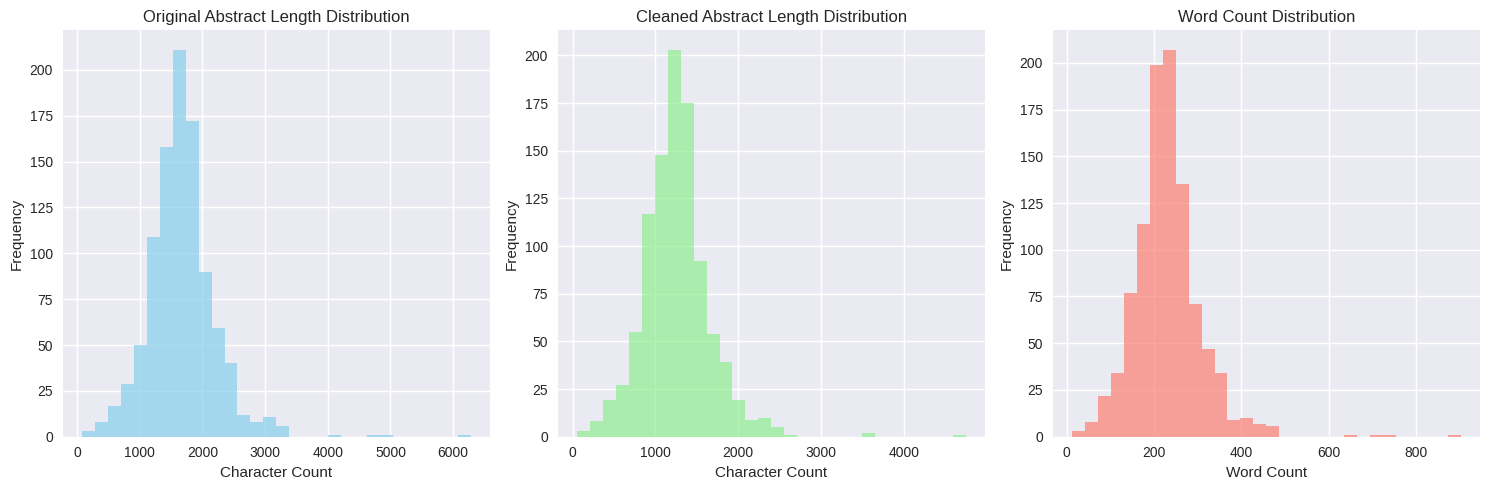


Text Statistics:
Average abstract length: 1669 characters
Average word count: 230 words
Average cleaned length: 1254 characters


In [118]:
# Analyze text lengths
df['Abstract_Length'] = df['Abstract'].str.len()
df['Cleaned_Abstract_Length'] = df['Cleaned_Abstract'].str.len()
df['Word_Count'] = df['Abstract'].str.split().str.len()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original abstract length distribution
axes[0].hist(df['Abstract_Length'], bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('Original Abstract Length Distribution')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')

# Cleaned abstract length distribution
axes[1].hist(df['Cleaned_Abstract_Length'], bins=30, alpha=0.7, color='lightgreen')
axes[1].set_title('Cleaned Abstract Length Distribution')
axes[1].set_xlabel('Character Count')
axes[1].set_ylabel('Frequency')

# Word count distribution
axes[2].hist(df['Word_Count'], bins=30, alpha=0.7, color='salmon')
axes[2].set_title('Word Count Distribution')
axes[2].set_xlabel('Word Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"\nText Statistics:")
print(f"Average abstract length: {df['Abstract_Length'].mean():.0f} characters")
print(f"Average word count: {df['Word_Count'].mean():.0f} words")
print(f"Average cleaned length: {df['Cleaned_Abstract_Length'].mean():.0f} characters")

## 3. Category Analysis

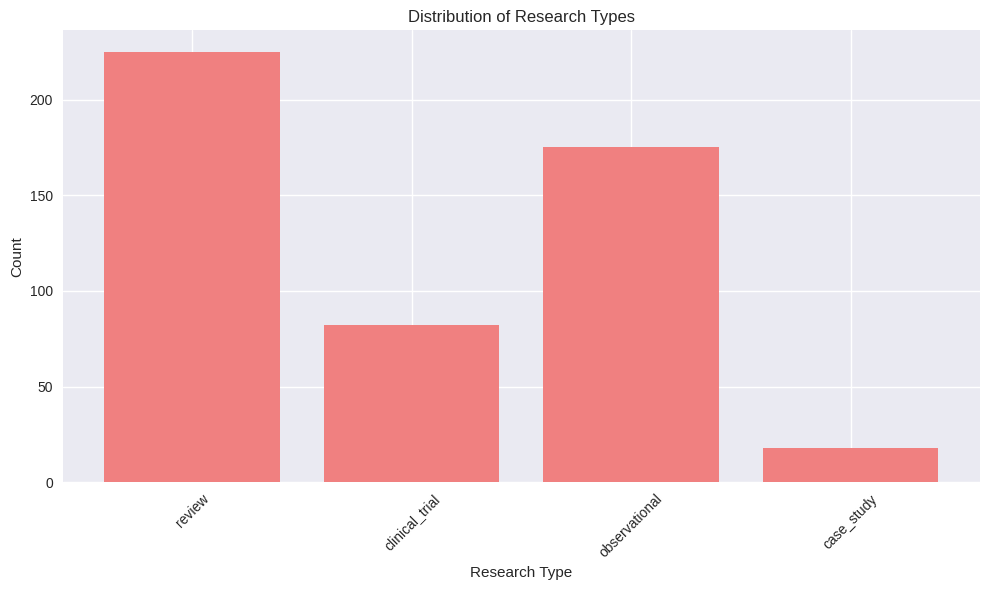


Research Type Distribution:
review: 225
observational: 175
clinical_trial: 82
case_study: 18


In [119]:
# Analyze research types
research_types = []
for types in df['Research_Type'].dropna():
    research_types.extend(types.split('; '))

research_counts = Counter(research_types)

plt.figure(figsize=(10, 6))
plt.bar(research_counts.keys(), research_counts.values(), color='lightcoral')
plt.title('Distribution of Research Types')
plt.xlabel('Research Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nResearch Type Distribution:")
for research_type, count in research_counts.most_common():
    print(f"{research_type}: {count}")

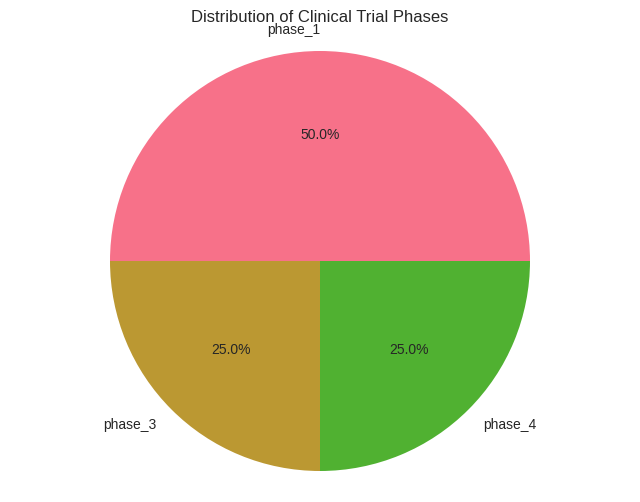


Trial Phase Distribution:
phase_1: 2
phase_3: 1
phase_4: 1


In [120]:
# Analyze trial phases
trial_phases = []
for phases in df['Trial_Phase'].dropna():
    trial_phases.extend(phases.split('; '))

phase_counts = Counter(trial_phases)

if phase_counts:
    plt.figure(figsize=(8, 6))
    plt.pie(phase_counts.values(), labels=phase_counts.keys(), autopct='%1.1f%%')
    plt.title('Distribution of Clinical Trial Phases')
    plt.axis('equal')
    plt.show()
    
    print(f"\nTrial Phase Distribution:")
    for phase, count in phase_counts.most_common():
        print(f"{phase}: {count}")
else:
    print("No trial phases found in the dataset.")

## 4. Disease Analysis

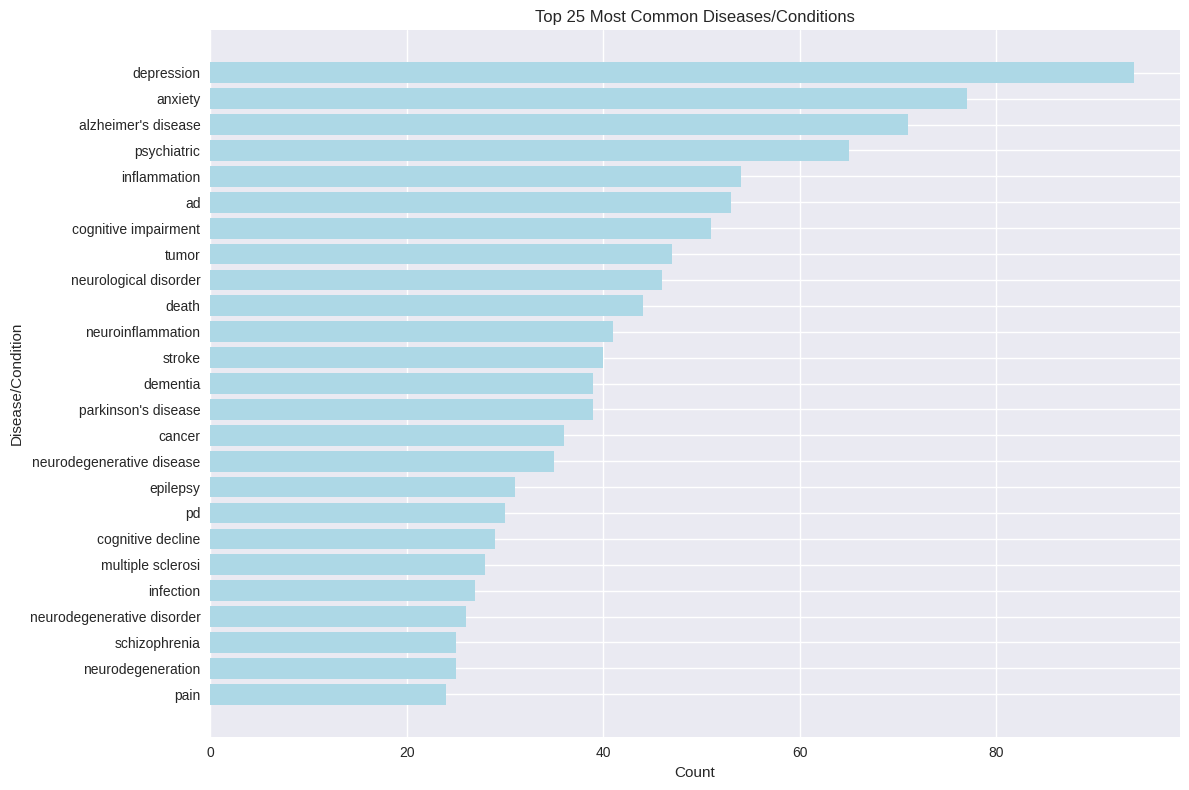


Top 10 Diseases/Conditions:
depression: 94
anxiety: 77
alzheimer's disease: 71
psychiatric: 65
inflammation: 54
ad: 53
cognitive impairment: 51
tumor: 47
neurological disorder: 46
death: 44


In [121]:
# Analyze diseases
diseases = []

for disease_list in df['Diseases'].dropna():
    diseases.extend(disease_list.split('; '))

disease_counts = Counter(diseases)

# Show top 15 diseases
top_diseases = dict(disease_counts.most_common(25))

plt.figure(figsize=(12, 8))
plt.barh(list(top_diseases.keys()), list(top_diseases.values()), color='lightblue')
plt.title('Top 25 Most Common Diseases/Conditions')
plt.xlabel('Count')
plt.ylabel('Disease/Condition')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nTop 10 Diseases/Conditions:")
for disease, count in disease_counts.most_common(10):
    print(f"{disease}: {count}")

In [122]:
# Get all unique diseases (after splitting and stripping)
all_diseases = set()
for entry in df['Diseases'].dropna():
    all_diseases.update([d.strip() for d in entry.split(';') if d.strip()])

# Sort alphabetically
sorted_diseases = sorted(all_diseases, key=lambda x: x.lower())

# Display as a list
for disease in sorted_diseases:
    print(disease)
    
print(f"\nTotal unique diseases: {len(sorted_diseases)}")

& obsession
(nbs)-positive krabbe disease
(s)-eriodictyol 7-o-(6-β-o-trans-p-coumaroyl)-β-d-glucopyranoside
/math
2].
412
6
a mental disorder
a-mci
a-t
aald
abdominal obesity
abdominal pain
abdominal pain hypersensitivity
abducens nerve palsie
abducens nerve palsy
abduction
abnormal auditory brainstem response
abnormal blinking
abnormal cerebrospinal fluid
abnormal eye movement
abnormal involuntary movement
abnormal movement disorder
abnormal salience processing
abnormal sensation
abnormalities of sensory postural
abortion
abscess
absence epilepsy
ac
accelerated neurological decline
accommodation behavior
achalasia
acidemia
acinetobacter
acne
acneiform
acneiform eruption
acromegaly
actin/cofilin-mediated dendritic spine destabilization
acute agitation
acute cardiovascular disease
acute dystonic reaction
acute febrile illness
acute flaccid paralysi
acute ischemic strok
acute ischemic stroke
acute kidney injury
acute late-onset encephalopathy
acute limb weakness
acute liver failure
acute

In [123]:
# Example mapping for diseases and chemicals
disease_mapping = {
    "violence/sexual abuse": "violence",
    "violent crime": "violence",
    "violent crime offenders without and with mental illness": "violence",
    "violent crimes": "violence",
    "violent loss": "violence",
    "violent losses increase": "violence",
    "violent or disruptive": "violence",
    "type 2 diabetes": "type 2 diabetes",
    "type 2 diabetes mellitus": "type 2 diabetes",
    "type-2 diabetes": "type 2 diabetes",
    "tumor": "tumor",
    "tumor necrosis": "tumor",
    "tumors": "tumor",
    "tumour": "tumor",
    "trauma": "trauma",
    "traumas": "trauma",
    "traumatic": "trauma",
    "traumatic brain injuries": "trauma",
    "traumatic brain injury": "trauma",
    "thrombocytosis": "thrombosis",
    "thromboembolic": "thrombosis",
    "thrombosis": "thrombosis",
    "thrombotic disease": "thrombosis",
    "substance abuse": "substance abuse",
    "substance addiction": "substance abuse",
    "substance-related": "substance abuse",
    "substance-related behaviors": "substance abuse",
    "substance-related disorders": "substance abuse",
    "stroke": "stroke",
    "stroke-like episodes": "stroke",
    "stroke-like migraine": "stroke",
    "stroke-related": "stroke",
    "stroke-related impairments": "stroke",
    "strokes": "stroke",
    "sleep and cognitive symptoms": "sleep disorder",
    "sleep anxiety": "sleep disorder",
    "sleep behavior disorder": "sleep disorder",
    "sleep bruxism": "sleep disorder",
    "sleep deficits": "sleep disorder",
    "sleep difficulties": "sleep disorder",
    "sleep disorder": "sleep disorder",
    "sleep disorders": "sleep disorder",
    "sleep disturbance": "sleep disorder",
    "sleep disturbance anxiety": "sleep disorder",
    "sleep disturbances": "sleep disorder",
    "sleep impairments": "sleep disorder",
    "sleep-disordered": "sleep disorder",
    "sleep-related errors": "sleep disorder",
    "sleep-related leg movements": "sleep disorder",
    "sleep-wake disorders": "sleep disorder",
    "sleepiness": "sleep disorder",
    "sleeping problems": "sleep disorder",
    "seizure": "seizure",
    "seizure-related": "seizure",
    "seizure-triggering": "seizure",
    "seizures": "seizure",
    "seizures/convulsions": "seizure",
    "schizoid personality disorders": "schizoid personality disorder",
    "schizophrenia": "schizophrenia",
    "scz": "schizophrenia",
    "schizophrenia spectrum disorders": "schizophrenia",
    "schizophrenia traits": "schizophrenia",
    "psychiatric": "psychiatric disorder",
    "psychiatric disorder": "psychiatric disorder",
    "psychiatric disorders": "psychiatric disorder",
    "psychiatric illness": "psychiatric disorder",
    "psychological distress": "psychological disorder",
    "psychopathic": "psychopathic disorder",
    "psychopathologies": "psychopathic disorder",
    "psychopathy": "psychopathic disorder",
    "psychoses": "psychotic disorder",
    "psychosis": "psychotic disorder",
    "psychosocial dysfunction": "psychotic disorder",
    "psychotic": "psychotic disorder",
    "psychotic disorder": "psychotic disorder",
    "psychotic disorders": "psychotic disorder",
    "psychotic ideation": "psychotic disorder",
    "psychotic illness": "psychotic disorder",
    "psychotic illnesses": "psychotic disorder",
    "psychotic symptoms": "psychotic disorder",
    "posttraumatic pleiosomnia": "post-traumatic stress disorder",
    "posttraumatic sleep": "post-traumatic stress disorder",
    "posttraumatic stress": "post-traumatic stress disorder",
    "posttraumatic stress disorder": "post-traumatic stress disorder",
    "ptsd": "post-traumatic stress disorder",
    "post-traumatic": "post-traumatic stress disorder",
    "post-traumatic sequelae": "post-traumatic stress disorder",
    "post-traumatic stress": "post-traumatic stress disorder",
    "post-traumatic stress disorder": "post-traumatic stress disorder",
    "post-traumatic stress disorders": "post-traumatic stress disorder",
    "post-traumatic symptoms": "post-traumatic stress disorder",
    "personality disorders": "personality disorder",
    "personality traits": "personality trait",
    "parkinson": "parkinson's disease",
    "parkinson disease": "parkinson's disease",
    "parkinson's": "parkinson's disease",
    "parkinson's and alzheimer's disease": "parkinson's disease and alzheimer's disease",
    "parkinson's and alzheimer's diseases": "parkinson's disease and alzheimer's disease",
    "parkinson's disease (pd)-causing mutations": "parkinson's disease",
    "parkinson's disease dementia": "parkinson's disease",
    "parkinson's disease questionnaire-39 (pdq-39)": "parkinson's disease",
    "parkinson's disease rating scale": "parkinson's disease",
    "parkinson's disease-like disorders": "parkinson's disease",
    "parkinson's disease.": "parkinson's disease",
    "parkinson-like disorders": "parkinson's disease",
    "parkinsonian disorders": "parkinson's disease",
    "parkinsonian motor symptoms": "parkinson's disease",
    "parkinsonian syndromes": "parkinson's disease",
    "parkinsonism": "parkinson's disease",
    "panic": "panic attack",
    "panic anxiety": "panic attack",
    "panic disorder": "panic attack",
    "panic attacks": "panic attack",
    "panic attacks": "panic attack",
    "od": "overdose",
    "overdose": "overdose",
    "overdose deaths": "overdose",
    "overdosed": "overdose",
    "overdoses": "overdose",
    "neuropsychiatric": "neuropsychiatric disorder",
    "neuropsychiatric abnormalities": "neuropsychiatric disorder",
    "neuropsychiatric and cognitive deficits": "neuropsychiatric disorder",
    "neuropsychiatric deficits": "neuropsychiatric disorder",
    "neuropsychiatric disease": "neuropsychiatric disorder",
    "neuropsychiatric disorders": "neuropsychiatric disorder",
    "neuropsychiatric syndrome": "neuropsychiatric disorder",
    "neuropsychiatric syndromes": "neuropsychiatric disorder",
    "neurodevelopmental": "neurodevelopmental disorder",
    "neurodevelopmental complications": "neurodevelopmental disorder",
    "neurodevelopmental diseases": "neurodevelopmental disorder",
    "neurodevelopmental disorder": "neurodevelopmental disorder",
    "neurodevelopmental disorders": "neurodevelopmental disorder",
    "neurodevelopmental disturbances": "neurodevelopmental disorder",
    "neurodevelopmental impairment": "neurodevelopmental disorder",
    "neurodevelopmental problems": "neurodevelopmental disorder",
    "neurodevelopmental sequela": "neurodevelopmental disorder",
    "neurodevelopmental sequelae": "neurodevelopmental disorder",
    "neurocognitive decision-making deficits": "neurocognitive disorder",
    "neurocognitive deficits": "neurocognitive disorder",
    "neurocognitive disorder": "neurocognitive disorder",
    "neurocognitive disorders": "neurocognitive disorder",
    "neurocognitive impairment": "neurocognitive disorder",
    "neurocognitive impairments": "neurocognitive disorder",
    "neurocognitive sequelae": "neurocognitive disorder",
    "neurodegeneration": "neurodegenerative disorder",
    "neurodegenerative": "neurodegenerative disorder",
    "neurodegenerative disease": "neurodegenerative disorder",
    "neurodegenerative diseases": "neurodegenerative disorder",
    "neurodegenerative disorder": "neurodegenerative disorder",
    "neurodegenerative disorders": "neurodegenerative disorder",
    "neurodegenerative gi disorders": "neurodegenerative disorder",
    "neurodegenerative lesions": "neurodegenerative disorder",
    "ms": "multiple sclerosis",
    "ms-related disability": "multiple sclerosis",
    "multiple sclerosis": "multiple sclerosis",
    "multiple sclerosis-related symptoms": "multiple sclerosis",
    "multiple sclerosis-specific symptoms": "multiple sclerosis",
    "motor" : "motor deficits",
    "motor and sensory dysfunction": "motor deficits",
    "motor coordination impairment": "motor deficits",
    "motor deficits": "motor deficits",
    "muscle atrophy": "muscle deficiency",
    "muscular abnormality": "muscle deficiency",
    "muscular atrophy": "muscle deficiency",
    "muscular dystrophies": "muscle deficiency",
    "muscle cell degeneration": "muscle deficiency",
    "muscle contractions": "muscle deficiency",
    "muscle cramps": "muscle deficiency",
    "muscle degeneration": "muscle deficiency",
    "muscle endurance": "muscle deficiency",
    "muscle loss": "muscle deficiency",
    "muscle mass": "muscle deficiency",
    "muscle of juvenile dermatomyositis": "muscle deficiency",
    "muscle pain": "muscle deficiency",
    "muscle tendons": "muscle deficiency",
    "muscle wasting": "muscle deficiency",
    "muscle deficiency": "muscle deficiency",
    "muscle-wasting disease": "muscle deficiency",
    "motor delay": "motor deficits",
    "motor dysfunction": "motor deficits",
    "motor impairments": "motor deficits",
    "motor neuron disease": "motor deficits",
    "movement disorder": "motor deficits",
    "movement disorders": "motor deficits",
    "muscle deficiency": "motor deficits",
    "muscle weakness and atrophy": "motor deficits",
    "muscle weakness and atrophy": "motor deficits",
    "mood disorders": "mood disorder",
    "mood disturbance": "mood disorder",
    "mood/anxiety disorders": "mood disorder",
    "mood/apathy": "mood disorder",
    "mitochondrial abnormalities": "mitochondrial disorder",
    "mitochondrial alterations": "mitochondrial disorder",
    "mitochondrial damage": "mitochondrial disorder",
    "mitochondrial disorders": "mitochondrial disorder",
    "mitochondrial dysfunction": "mitochondrial disorder",
    "metabolic disease": "metabolic disorder",
    "metabolic disorders": "metabolic disorder",
    "metabolic disturbance": "metabolic disorder",
    "metabolic disturbances": "metabolic disorder",
    "metabolic dysfunction": "metabolic disorder",
    "metabolic dysfunction-associated steatotic liver disease": "metabolic disorder",
    "metabolic dysfuntion": "metabolic disorder",
    "metabolic syndrome": "metabolic disorder",
    "metabolic syndromes": "metabolic disorder",
    "mental disorder": "mental disorder",
    "mental disorders": "mental disorder",
    "mental disorders face various barriers on the road": "mental disorder",
    "mental health-related disorders": "mental disorder",
    "mental illness": "mental disorder",
    "mental quality of life": "mental disorder",
    "mental retardation": "mental disorder",
    "memory defects": "memory deficiency",
    "memory deficit": "memory deficiency",
    "memory deficits": "memory deficiency",
    "memory disorders": "memory deficiency",
    "memory impairments": "memory disorder",
    "memory loss": "memory disorder",
    "liver damage": "liver disease",
    "liver disease": "liver disease",
    "liver diseases": "liver disease",
    "liver dysfunction": "liver disease",
    "liver fibrosis": "liver disease",
    "liver injury": "liver disease",
    "ibd": "ibd",
    "inflammatory bowel disease": "ibd",
    "inflammatory bowel disease-like": "ibd",
    "inflammatory bowel disease-like symptoms": "ibd",
    "inflammatory bowel disease-like symptoms": "ibd",
    "infection": "infection",
    "infections": "infection",
    "infectious disease": "infection",
    "infectious diseases": "infection",
    "immune disorders": "immune disorder",
    "immune dysfunction": "immune disorder",
    "immune-mediated disease": "immune disorder",
    "immune-mediated diseases": "immune disorder",

    "huntington's disease": "huntington's disease",
    "huntington's disease and neurotraumatic disorders": "huntington's disease",
    "huntington's disease-like": "huntington's disease",
    "huntington's diseases": "huntington's disease",
    "huntington's neurodegenerative diseases": "huntington's disease",
    "hiv (pwh": "hiv",
    "hiv infection": "hiv",
    "hiv mortality and decreased retention": "hiv",
    "hiv serologies": "hiv",
    "hiv-associated ani": "hiv",
    "hiv-associated neurocognitive disorders": "hiv",
    "hiv-associated sensory neuropathy": "hiv",
    "hiv-related": "hiv",
    "heart disease": "heart disease",
    "heart failure": "heart disease",
    "hearing disorders": "hearing impairment",
    "hearing impairment": "hearing impairment",
    "hearing loss": "hearing impairment",
    "hearing loss (<0.05)": "hearing impairment",
    "guillain-barre syndrome": "guillain-barre syndrome",
    "guillain-barrè syndrome": "guillain-barre syndrome",
    "guillain-barré syndrome": "guillain-barre syndrome",
    "glioblastoma": "glioma/glioblastoma",
    "glioblastoma multiforme": "glioma/glioblastoma",
    "glioma": "glioma/glioblastoma",
    "glioma aggressiveness": "glioma/glioblastoma",
    "gliomas": "glioma/glioblastoma",

    "gastroenteritis": "gastrointestinal disorder",
    "gastrointestinal (gi) disorders": "gastrointestinal disorder",
    "gastrointestinal (gi) motility disorders": "gastrointestinal disorder",
    "gastrointestinal (gi) tract within 8": "gastrointestinal disorder",
    "gastrointestinal and musculoskeletal symptoms": "gastrointestinal disorder",
    "gastrointestinal bleeding": "gastrointestinal disorder",
    "gastrointestinal comorbidities": "gastrointestinal disorder",
    "gastrointestinal disorders": "gastrointestinal disorder",
    "gastrointestinal hemorrhage": "gastrointestinal disorder",
    "gastrointestinal tract": "gastrointestinal disorder",

    "gait ataxia": "gait impairment",
    "gait disturbance": "gait impairment",
    "gait disturbances": "gait impairment",
    "gait impairments": "gait impairment",
    "gait instability": "gait impairment",
    "fear-circuit": "fear-related disorder",
    "fear-related disorders": "fear-related disorder",
    "fear/anxiety": "fear-related disorder",
    "extraintestinal": "extraintestinal disease",
    "extraintestinal diseases": "extraintestinal disease",
    "extraintestinal manifestation of": "extraintestinal disease",
    "extraintestinal manifestations": "extraintestinal disease",
    "epilepsies": "epilepsy",
    "epilepsy": "epilepsy",
    "epilepsy syndrome": "epilepsy",
    "epileptic": "epilepsy",
    "epileptic encephalopathies": "epilepsy",
    "epileptic encephalopathy": "epilepsy",
    "epileptic se": "epilepsy",
    "epileptic seizures": "epilepsy",
    "dystonia": "dystonia",
    "dystonic dysarthria": "dystonia",
    "dystonic movements": "dystonia",
    "disordered eating": "eating disorder",
    "disordered eating behaviors-such": "eating disorder",
    "eating disorder": "eating disorder",
    "eating behavior": "eating disorder",
    "eating behaviors": "eating disorder",
    "eating difficulties": "eating disorder",
    "eating disorders": "eating disorder",
    "eating problems": "eating disorder",
    "eating disorder-like behavior": "eating disorder",
    "eating disorder-like behaviors": "eating disorder",
    "eating disorder-like symptoms": "eating disorder",
    "eating disorder-like symptoms": "eating disorder",
    "depressed": "depression",
    "depressed/anxious mood": "depression",
    "depression": "depression",
    "depression-like behaviors": "depression",
    "depression/anxiety": "depression",
    "depressive": "depression",
    "depressive disorder": "depression",
    "depressive disorders": "depression",
    "depressive symptoms": "depression",
    "depressive-like behavior": "depression",
    "depressive-like behaviors": "depression",
    "decline in cognitive abilities with age.": "dementia",
    "decline in cognitive function": "dementia",
    "degenerative diseases": "dementia",
    "dementias": "dementia",
    "dementia": "dementia",
    "dementia-like symptoms": "dementia",
    "dementia-like behavior": "dementia",
    "dementia-like behavior": "dementia",
    "death": "death",
    "deaths": "death",
    "cryptogenic ischemic stroke": "stroke",
    "cryptogenic stroke": "stroke",
    "covid-19 infection": "covid-19",
    "covid-19 infections": "covid-19",
    "covid-19-related discrimination": "covid-19",
    "covid-19-related hypochondriasis": "covid-19",
    "covid-19-related neuropathology": "covid-19",
    "coronavirus disease": "covid-19",
    "coronavirus disease 2019": "covid-19",
    "congenital abnormalities": "congenital anomaly",
    "congenital anomalies": "congenital anomaly",
    "congenital anomaly": "congenital anomaly",
    "congenital disorders": "congenital disorder",
    "comorbid disease": "comorbid disease",
    "comorbid disruptive behavior disorder": "comorbid disease",
    "comorbid eye diseases": "comorbid disease",
    "comorbid genetic disease": "comorbid disease",
    "comorbid sleep-disordered breathing": "comorbid disease",
    "comorbid somatic conditions": "comorbid disease",
    "comorbid somatizing": "comorbid disease",
    "comorbid stressor-related disorders": "comorbid disease",
    "acneiform": "acne",
    "acneiform eruptions": "acne",
    "acute ischemic strokes": "stroke",
    "acute ischemic stroke": "stroke",
    "acute stroke": "stroke",
    "acute myocardial infarction": "heart attack",
    "ad": "alzheimers disease",
    "alzheimers disease": "alzheimers disease",
    "addiction-like behaviors": "addiction",
    "addictive behaviors": "addiction",
    "addiction": "addiction",
    "addictive behavior": "addiction",
    "addictive behavior": "addiction",
    "adhd hyperactive/impulsivity symptoms": "adhd",
    "adhd-hyperactivity/impulsivity": "adhd",
    "adhd-inattention": "adhd",
    "adhd-like behaviors": "adhd",
    "adhd-like symptoms": "adhd",
    "adhd-pi": "adhd",
    "pd": "parkinsons disease",
    "parkinson's disease": "parkinsons disease",
    "parkinsons disease": "parkinsons disease",
    "attention deficit hyperactivity disorder": "adhd",
    "attention deficit disorder": "aggression",
    "agoraphobic syndrome": "agoraphobia",
    "agoraphobia": "agoraphobia",
    "anxiety": "anxiety",
    "anxiety disorder": "anxiety",
    "alcohol abuse": "alcoholism",
    "alcohol dependence": "alcoholism",
    "alcohol-associated disease": "alcoholism",
    "alcohol-related disorders": "alcoholism",
    "alcohol-related traits": "alcoholism",
    "alzheimer": "alzheimers disease",
    "alzheimer disease": "alzheimers disease",
    "alzheimer disease/frontotemporal": "alzheimers disease",
    "alzheimer's": "alzheimers disease",
    "alzheimer's and parkinson's disease": "alzheimers disease",
    "alzheimer's and parkinson's diseases": "alzheimers disease",
    "alzheimer's and related dementias": "alzheimers disease",
    "alzheimer's disease (ad)-derived scaffolds": "alzheimers disease",
    "alzheimer's disease (ad)-related gene expression.": "alzheimers disease",
    "alzheimer's disease and ischemic stroke": "alzheimers disease",
    "alzheimer's disease and vascular dementia": "alzheimers disease",
    "alzheimer's disease assessment scale-cognition 14 improved by 2.8 pts (<i>p</i> = 0.037)": "alzheimers disease",
    "alzheimer's disease assessment scale-cognitive section": "alzheimers disease",
    "alzheimer's disease clinical trials.": "alzheimers disease",
    "alzheimer's disease dementia": "alzheimers disease",
    "alzheimer's disease drug": "alzheimers disease",
    "alzheimer's disease neuroimaging initiative": "alzheimers disease",
    "alzheimer's disease or chronic traumatic encephalopathy": "alzheimers disease",
    "alzheimer's disease rating scale (behave-ad)": "alzheimers disease",
    "alzheimer's disease rats (ad": "alzheimers disease",
    "alzheimer's intervention.": "alzheimers disease",
    "alzheimer's disease": "alzheimers disease",
    "amnesia": "amnesia",
    "amnestic cognitive impairment": "amnesia",
    "amnestic mci": "amnesia",
    "amnestic mild cognitive impairment": "amnesia",
    "aneurismal subarachnoid hemorrhage": "aSAH",
    "aneurysmal sah": "aSAH",
    "aneurysmal subarachnoid hemorrhage": "aSAH",
    "aSAH": "aSAH",
    "asah" : "aSAH",
    "subarachnoid hemorrhage": "aSAH",
    "subarachnoid hemorrhage": "aSAH",
    "anxiety": "anxiety",
    "anxiety disorder": "anxiety",
    "anxiety disorder-7": "anxiety",
    "anxiety disorders": "anxiety",
    "anxiety-like behaviors": "anxiety",
    "anxiety/depression": "anxiety",
    "anxious/depressive": "anxiety",
    "apnea": "apnea",
    "apnea-hypopnea": "apnea",
    "apnoea": "apnea",
    "apnoea-hypopnea": "apnea",
    "apnoea-hypopnea syndrome": "apnea",
    "asd": "autism spectrum disorder",
    "asds": "autism spectrum disorder",
    "atherosclerotic": "atherosclerosis",
    "atherosclerotic lesions": "atherosclerosis",
    "atherosclerosis": "atherosclerosis",
    "atherosclerotic plaque": "atherosclerosis",
    "attention deficit": "adhd",
    "attention deficit hyperactivity disorder": "adhd",
    "attention deficit/hyperactivity disorder": "adhd",
    "attention deficits": "adhd",
    "attention-deficit hyperactivity disorder": "adhd",
    "attention-deficit/hyperactivity disorder": "adhd",
    "attention-seeking": "adhd",
    "attention/memory": "adhd",
    "attentional deficits": "adhd",
    "autism": "autism spectrum disorder",
    "autism spectrum disorder": "autism spectrum disorder",
    "autism spectrum disorders": "autism spectrum disorder",
    "autism-like behaviors": "autism spectrum disorder",
    "autistic": "autism spectrum disorder",
    "autistic spectrum disorder": "autism spectrum disorder",
    "autistic symptoms": "autism spectrum disorder",
    "autistic traits": "autism spectrum disorder",
    "autoimmune disease": "autoimmune disease",
    "autoimmune disease of the central nervous system": "autoimmune disease",
    "autoimmune diseases": "autoimmune disease",
    "autoimmune disorder": "autoimmune disease",
    "autoimmune disorders": "autoimmune disease",
    "autosomal recessive": "autosomal recessive disease",
    "autosomal recessive disorder": "autosomal recessive disease",
    "autosomal recessive juvenile parkinson disease": "autosomal recessive disease",
    "autosomal recessive lethal ciliopathy": "autosomal recessive disease",
    "autosomal recessive movement and vision disorder": "autosomal recessive disease",
    "autosomal recessive neurodegenerative disorder": "autosomal recessive disease",
    "autosomal dominant": "autosomal dominant disease",
    "autosomal dominant disorder": "autosomal dominant disease",
    "autosomal dominant juvenile parkinson disease": "autosomal dominant disease",
    "autosomal dominant movement and vision disorder": "autosomal dominant disease",
    "autosomal dominant neurodegenerative disorder": "autosomal dominant disease",
    "autosomal dominant disease": "autosomal dominant disease",
    "behavior disorders": "behavioral disorder",
    "behavioral & cognitive dysfunction": "behavioral disorder",
    "behavioral abnormalities": "behavioral disorder",
    "behavioral and functional impairments": "behavioral disorder",
    "behavioral deficits": "behavioral disorder",
    "behavioral difficulties": "behavioral disorder",
    "behavioral disorders": "behavioral disorder",
    "behavioral impairments": "behavioral disorder",
    "behavioural abnormalities": "behavioral disorder",
    "behavioural disorders": "behavioral disorder",
    "behavioural impairment": "behavioral disorder",
    "behavioural variant frontotemporal dementia": "behavioral disorder",
    "bipolar": "bipolar disorder",
    "bipolar disorder": "bipolar disorder",
    "bipolar disorders": "bipolar disorder",
    "bipolar i disorder": "bipolar disorder",
    "bipolar ii disorder": "bipolar disorder",
    "brain malignancies": "brain tumor",
    "brain small": "brain tumor",
    "brain tumor": "brain tumor",
    "brain tumors": "brain tumor",
    "cardiovascular disease": "cardiovascular disease",
    "cardiovascular diseases": "cardiovascular disease",
    "cardiovascular disorders": "cardiovascular disease",
    "cardiovascular dysregulation": "cardiovascular disease",
    "ccm": "ccm",
    "ccm lesion": "ccm",
    "ccm lesions": "ccm",
    "cognitive": "cognitive decline",
    "cognitive and affective processes": "cognitive decline",
    "cognitive and behavioral symptoms": "cognitive decline",
    "cognitive and behavioural impairments": "cognitive decline",
    "cognitive and emotional dysregulation": "cognitive decline",
    "cognitive and motor functions": "cognitive decline",
    "cognitive and neuropsychiatric symptoms": "cognitive decline",
    "cognitive and psychiatric": "cognitive decline",
    "cognitive and psychiatric adverse": "cognitive decline",
    "cognitive and psychiatric adverse effects": "cognitive decline",
    "cognitive behavioural": "cognitive decline",
    "cognitive complaints": "cognitive decline",
    "cognitive decline": "cognitive decline",
    "cognitive deficits": "cognitive decline",
    "cognitive deterioration": "cognitive decline",
    "cognitive disengagement syndrome": "cognitive decline",
    "cognitive disorders": "cognitive decline",
    "cognitive dysfunction": "cognitive decline",
    "cognitive failures": "cognitive decline",
    "cognitive impairment": "cognitive decline",
    "cognitive impairments": "cognitive decline",
    "cognitive memory": "cognitive decline",
    "cognitive or psychiatric": "cognitive decline",
    "cognitive sequelae": "cognitive decline",
    "cognitive symptoms": "cognitive decline",
    "cognitive-motor dissociation": "cognitive decline",

    # Add more mappings as neede
}



In [124]:
def map_terms(cell, mapping):
    if pd.isna(cell):
        return cell
    items = [item.strip().lower() for item in cell.split(';') if item.strip()]
    mapped = [mapping.get(item, item) for item in items]
    # Remove duplicates while preserving order
    seen = set()
    unique_items = [x for x in mapped if not (x in seen or seen.add(x))]
    return '; '.join(unique_items) if unique_items else np.nan

df_cleaned['Diseases'] = df_cleaned['Diseases'].apply(lambda x: map_terms(x, disease_mapping))

4394


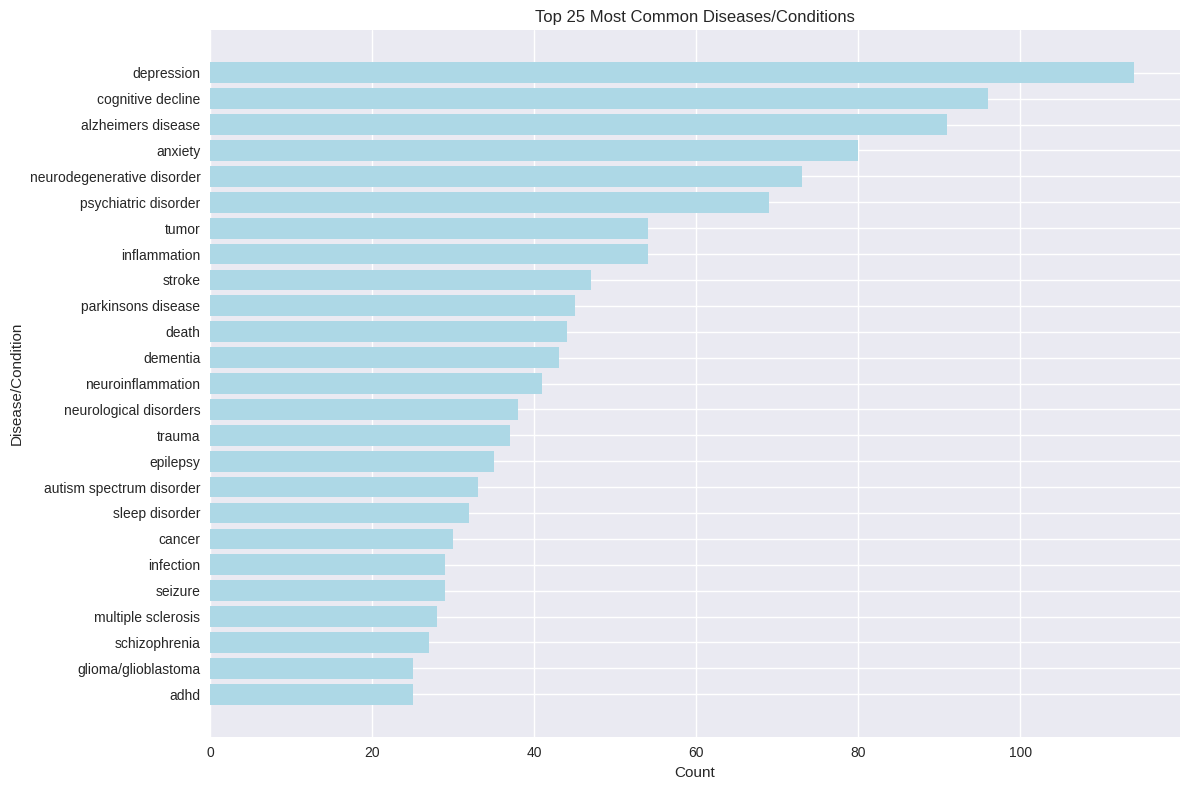


Top 10 Diseases/Conditions:
depression: 114
cognitive decline: 96
alzheimers disease: 91
anxiety: 80
neurodegenerative disorder: 73
psychiatric disorder: 69
tumor: 54
inflammation: 54
stroke: 47
parkinsons disease: 45


In [125]:
# Analyze diseases
diseases = []

for disease_list in df_cleaned['Diseases'].dropna():
    diseases.extend(disease_list.split('; '))

disease_counts = Counter(diseases)
print(len(diseases))
# Show top 15 diseases
top_diseases = dict(disease_counts.most_common(25))

plt.figure(figsize=(12, 8))
plt.barh(list(top_diseases.keys()), list(top_diseases.values()), color='lightblue')
plt.title('Top 25 Most Common Diseases/Conditions')
plt.xlabel('Count')
plt.ylabel('Disease/Condition')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nTop 10 Diseases/Conditions:")
for disease, count in disease_counts.most_common(10):
    print(f"{disease}: {count}")


In [127]:
# Get all unique diseases (after splitting and stripping)
chemicals = set()
for entry in df_cleaned['Chemicals'].dropna():
    chemicals.update([c.strip() for c in entry.split(';') if c.strip()])

# Sort alphabetically
sorted_chemicals = sorted(chemicals, key=lambda x: x.lower())

# Display as a list
for chemical in sorted_chemicals:
    print(chemical)
    
print(f"\nTotal unique chemicals: {len(sorted_chemicals)}")

(+)-epicatechin
-alpha
0.1mg.kg-1
0.625
026
1
1-methyl-4-phenyl-1
1.019
12mg
140
1421
2
2-diamine
2-dimyristoyl-sn-glycero-3-phosphocholine
25-dihydroxycholecalciferol
25-hydroxy vitamin d
25-hydroxycholesterol
2:1
3
4
4-aminopyridine
4-ap
40mg
5)p
5-ala
5-aminolevulinic acid
5-bisphosphate
5-di-o-caffeoyl quinic acid
5-ht
5-hydroxymethylcytosine
5-hydroxytryptamine
5-methylcytosine
5-trisphosphate
5552
5678
6-hydroxydopamine
6-tetrahydropyridine
677c
7-ketocholesterol
76.9%/76.9
7α-hydroxycholesterol
816.39
9
90-day
939
a+t+
a-β</sub
a2ar
a2ars
a</sub
aa
aav-rnai
aba
abga
abt-288
acetylcholine
ach
acp-a
acr
acridine
actin-based cell motility
ad
ad abortively
adalimumab
adenosine
adenosine triphosphate
adhdhi
adi
adshe
adshe seizures
aea
ai
ak2
akt
al
alcohol
alkali injury
alkylating agent
als
aluminum
aluminum chloride
aluminum toxicity
amantadine
ami
amikacin
amino acid
amino acid metabolic
amitriptyline
ammonium nitrate
amoxicillin
amp
ampicillin
amyloid
amyloid 40%
amyloid beta
amy

In [128]:
chemical_mapping = {
    "zn" : "zinc",
    "zinc" : "zinc",
    "zinc improves" : "zinc",
    "zinc improves" : "zinc",
    "trp" : "tryptophan",
    "trazadone" : "trazodone",
    "trazodone" : "trazodone",
    "tp5" : "thymopoietin",
    "tp" : "thymopoietin",
    "thymopoietin" : "thymopoietin",
    "tmt" : "trimethyltrienolone",
    "tmz" : "temozolomide",
    "temozolomide" : "temozolomide",
    "thc" : "tetrahydrocannabinol",
    "thc cannabis" : "tetrahydrocannabinol",
    "cannabis" : "tetrahydrocannabinol",
    "cannabinol" : "tetrahydrocannabinol",
    "cannabinoids" : "tetrahydrocannabinol",
    "cannabinoids improves" : "tetrahydrocannabinol",
    "tetrahydropyridine": "tetrahydropyridine",
    "mpt": "tetrahydropyridine",
    "1-methyl-4-phenyl-1,2,3,6-tetrahydropyridine": "tetrahydropyridine",
    "1-methyl-4-phenyl-1": "tetrahydropyridine",
    "5-HT": "serotonin",
    "5-hydroxytryptamine": "serotonin",
    "serotonin": "serotonin",
    "serotoninergic": "serotonin",
    "serotoninergic effects": "serotonin",
    "serotoninergic effects": "serotonin",
    "ca" :"calcium",
    "cu" :"copper",
    "dopamine": "dopamine",
    "da" : "dopamine",
    "dmpc": "synthetic phospholipid",
    "2-Dimyristoyl-sn-glycero-3-phosphocholine" : "synthetic phospholipid",
    "2-dimyristoyl-sn-glycero-3-phosphocholine" : "synthetic phospholipid",
    "fe" : "iron",
    "fndc5" : "fndc5",
    "fndc5 improves" : "fndc5",
    "fnd" : "fndc5",
    "hg" : "mercury",
    "k" : "potassium",
    "mg" : "magnesium",
    "na" : "sodium",
    "ni" : "nickel",
    "pb" : "lead",
    "pd" : "palladium",
    "pt" : "platinum", 
    "la" : "lanthanum",
    "li" : "lithium",
    "mn" : "manganese",
    "pgrn" : "progranuline",
    "progranuline" : "progranuline",
    "progranuline improves" : "progranuline",
    "mo" : "molybdenum",
    "na" : "sodium",
    "ni" : "nickel",
    "pb" : "lead",
    "ptz" : "pentylenetetrazol",
    "ros" : "reactive oxygen species",
    "ssri" : "selective serotonin reuptake inhibitors",
    "ssris" : "selective serotonin reuptake inhibitors",
    "stz" : "streptozotocin",
    "t3" : "triiodothyronine",

    # Add more mappings as needros ed
}

In [129]:
def map_terms(cell, mapping):
    if pd.isna(cell):
        return cell
    items = [item.strip().lower() for item in cell.split(';') if item.strip()]
    mapped = [mapping.get(item, item) for item in items]
    # Remove duplicates while preserving order
    seen = set()
    unique_items = [x for x in mapped if not (x in seen or seen.add(x))]
    return '; '.join(unique_items) if unique_items else np.nan

df_cleaned['Chemicals'] = df_cleaned['Chemicals'].apply(lambda x: map_terms(x, chemical_mapping))



In [131]:
def clean_chemical_list(cell):
    if pd.isna(cell):
        return np.nan
    cleaned = []
    for chem in re.split(r'[;,]', cell):
        chem = chem.strip().lower()
        # Skip if <3 chars
        if len(chem) < 3:
            continue
        # Skip if starts with non-alpha (and not a letter anywhere)
        if not re.search(r'[a-zA-Z]', chem):
            continue
        if not chem[0].isalpha():
            continue
        # Skip if only numbers or numbers+symbols (no letters)
        if not re.search(r'[a-zA-Z]', chem):
            continue
        cleaned.append(chem)
    # Remove duplicates while preserving order
    seen = set()
    unique_cleaned = [x for x in cleaned if not (x in seen or seen.add(x))]
    return '; '.join(unique_cleaned) if unique_cleaned else np.nan

# Apply to your DataFrame
df_cleaned['Chemicals'] = df_cleaned['Chemicals'].apply(clean_chemical_list)

In [132]:
chemicals = set()
for entry in df_cleaned['Chemicals'].dropna():
    chemicals.update([c.strip() for c in entry.split(';') if c.strip()])

# Sort alphabetically
sorted_chemicals = sorted(chemicals, key=lambda x: x.lower())

# Display as a list
for chemical in sorted_chemicals:
    print(chemical)
    
print(f"\nTotal unique chemicals: {len(sorted_chemicals)}")

a+t+
a-β</sub
a2ar
a2ars
a</sub
aav-rnai
aba
abga
abt-288
acetylcholine
ach
acp-a
acr
acridine
actin-based cell motility
ad abortively
adalimumab
adenosine
adenosine triphosphate
adhdhi
adi
adshe
adshe seizures
aea
ak2
akt
alcohol
alkali injury
alkylating agent
als
aluminum
aluminum chloride
aluminum toxicity
amantadine
ami
amikacin
amino acid
amino acid metabolic
amitriptyline
ammonium nitrate
amoxicillin
amp
ampicillin
amyloid
amyloid 40%
amyloid beta
amyloid beta 42/40
amyloid beta-42
amyloid deposits
amyloid plaques
amyloid precurson protein cleaving enzyme 1 (bace1)
amyloid precursor protein
amyloid status
amyloid toxicity
amyloid β
ana
anandamide
androstenediol
anfa140
ankyrin-g
annexin v/propidium iodide
annotation>$suvr\
ant
anti-adhd
anti-ganglioside
anti-n-methyl-d-aspartate
anti-seizure
anti-tfr
antidementia
antidepressant
antidepressants
antineurofascin
antiseizure
antitrypsin
aom
apamin
apigenin
apla
apocynin
apoe
appetite
aps
arachidonic acid
arginine
aripiprazole once-mo

In [133]:
all_chemicals = []
for entry in df_cleaned['Chemicals'].dropna():
    all_chemicals.extend([c.strip() for c in entry.split(';') if c.strip()])

total_mentions = len(all_chemicals)
print(f"Total chemical mentions in the dataset: {total_mentions}")

Total chemical mentions in the dataset: 1192


In [134]:
chemical_counts = Counter(all_chemicals)
print("Chemical mention counts (as a dictionary):")
pprint(dict(chemical_counts))
N = 20
print(f"Top {N} chemicals by mention count:")
for chem, count in chemical_counts.most_common(N):
    print(f"{chem}: {count}")

Chemical mention counts (as a dictionary):
{'a+t+': 1,
 'a-β</sub': 1,
 'a2ar': 1,
 'a2ars': 1,
 'a</sub': 1,
 'aav-rnai': 1,
 'aba': 2,
 'abga': 1,
 'abt-288': 1,
 'acetylcholine': 1,
 'ach': 1,
 'acp-a': 1,
 'acr': 1,
 'acridine': 1,
 'actin-based cell motility': 1,
 'ad abortively': 1,
 'adalimumab': 1,
 'adenosine': 1,
 'adenosine triphosphate': 1,
 'adhdhi': 1,
 'adi': 1,
 'adshe': 1,
 'adshe seizures': 1,
 'aea': 1,
 'ak2': 1,
 'akt': 1,
 'alcohol': 21,
 'alkali injury': 1,
 'alkylating agent': 1,
 'als': 1,
 'aluminum': 1,
 'aluminum chloride': 1,
 'aluminum toxicity': 1,
 'amantadine': 1,
 'ami': 1,
 'amikacin': 1,
 'amino acid': 5,
 'amino acid metabolic': 1,
 'amitriptyline': 3,
 'ammonium nitrate': 1,
 'amoxicillin': 1,
 'amp': 2,
 'ampicillin': 1,
 'amyloid': 3,
 'amyloid 40%': 1,
 'amyloid beta': 5,
 'amyloid beta 42/40': 2,
 'amyloid beta-42': 1,
 'amyloid deposits': 1,
 'amyloid plaques': 3,
 'amyloid precurson protein cleaving enzyme 1 (bace1)': 1,
 'amyloid precursor p

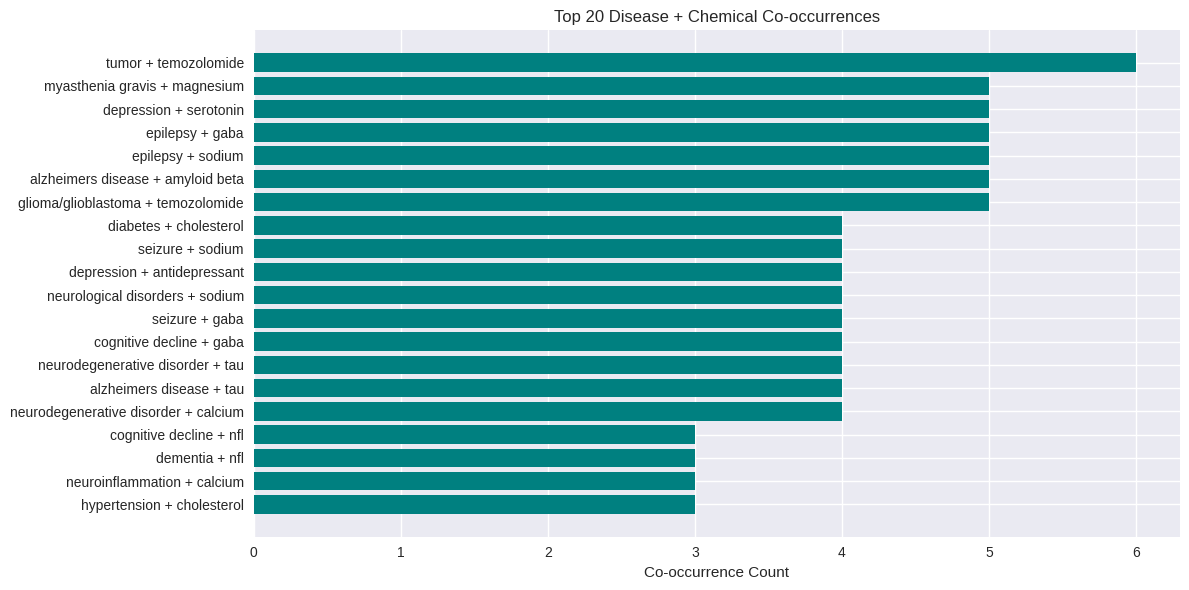

,Disease,Chemical,Count
0,tumor,temozolomide,6
1,myasthenia gravis,magnesium,5
2,depression,serotonin,5
3,epilepsy,gaba,5
4,epilepsy,sodium,5
5,alzheimers disease,amyloid beta,5
6,glioma/glioblastoma,temozolomide,5
7,diabetes,cholesterol,4
8,seizure,sodium,4
9,depression,antidepressant,4


In [135]:
# Parse diseases and chemicals into lists
df_cleaned['Diseases_list'] = df_cleaned['Diseases'].fillna('').apply(lambda x: [d.strip() for d in x.split(';') if d.strip()])
df_cleaned['Chemicals_list'] = df_cleaned['Chemicals'].fillna('').apply(lambda x: [c.strip() for c in x.split(';') if c.strip()])

# Count co-occurrences
pair_counter = Counter()
for diseases, chemicals in zip(df_cleaned['Diseases_list'], df_cleaned['Chemicals_list']):
    for pair in itertools.product(diseases, chemicals):
        pair_counter[pair] += 1

# Get top N co-occurring pairs
top_pairs = pair_counter.most_common(20)
diseases_top, chemicals_top, counts_top = zip(*[(d, c, cnt) for (d, c), cnt in top_pairs])

# Create a DataFrame for visualization

cooc_df = pd.DataFrame({
    'Disease': diseases_top,
    'Chemical': chemicals_top,
    'Count': counts_top
})

# Plot as a bar chart
plt.figure(figsize=(12, 6))
plt.barh([f'{d} + {c}' for d, c in zip(diseases_top, chemicals_top)], counts_top, color='teal')
plt.xlabel('Co-occurrence Count')
plt.title('Top 20 Disease + Chemical Co-occurrences')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

# Show the table
cooc_df.head(20)

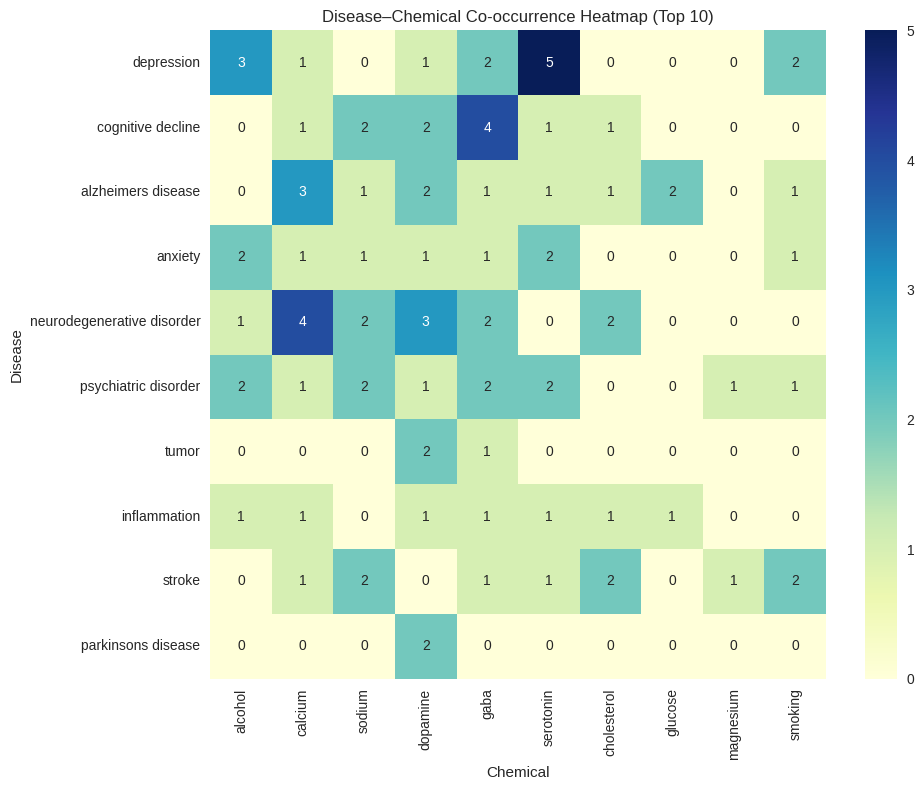

In [136]:

# Get top N diseases and chemicals
N = 10
top_diseases = [d for d, _ in Counter(itertools.chain.from_iterable(df_cleaned['Diseases_list'])).most_common(N)]
top_chemicals = [c for c, _ in Counter(itertools.chain.from_iterable(df_cleaned['Chemicals_list'])).most_common(N)]

# Build co-occurrence matrix
cooc_matrix = pd.DataFrame(0, index=top_diseases, columns=top_chemicals)

for diseases, chemicals in zip(df_cleaned['Diseases_list'], df_cleaned['Chemicals_list']):
    for d in diseases:
        for c in chemicals:
            if d in top_diseases and c in top_chemicals:
                cooc_matrix.loc[d, c] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(cooc_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Disease–Chemical Co-occurrence Heatmap (Top 10)')
plt.xlabel('Chemical')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()

## 5. Year Analysis

In [137]:
# Convert Year to integer (if possible) and drop NaNs
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)
# Count publications per year
year_counts = df['Year'].value_counts().sort_index()


print(f"\nYear Range: {year_counts.index.min()} - {year_counts.index.max()}")
print(f"Most recent year: {year_counts.index.max()} ({year_counts.iloc[-1]} publications)")
print(f"Oldest year: {year_counts.index.min()} ({year_counts.iloc[0]} publications)")


Year Range: 2024 - 2025
Most recent year: 2025 (980 publications)
Oldest year: 2024 (2 publications)


## 6. Journal Analysis

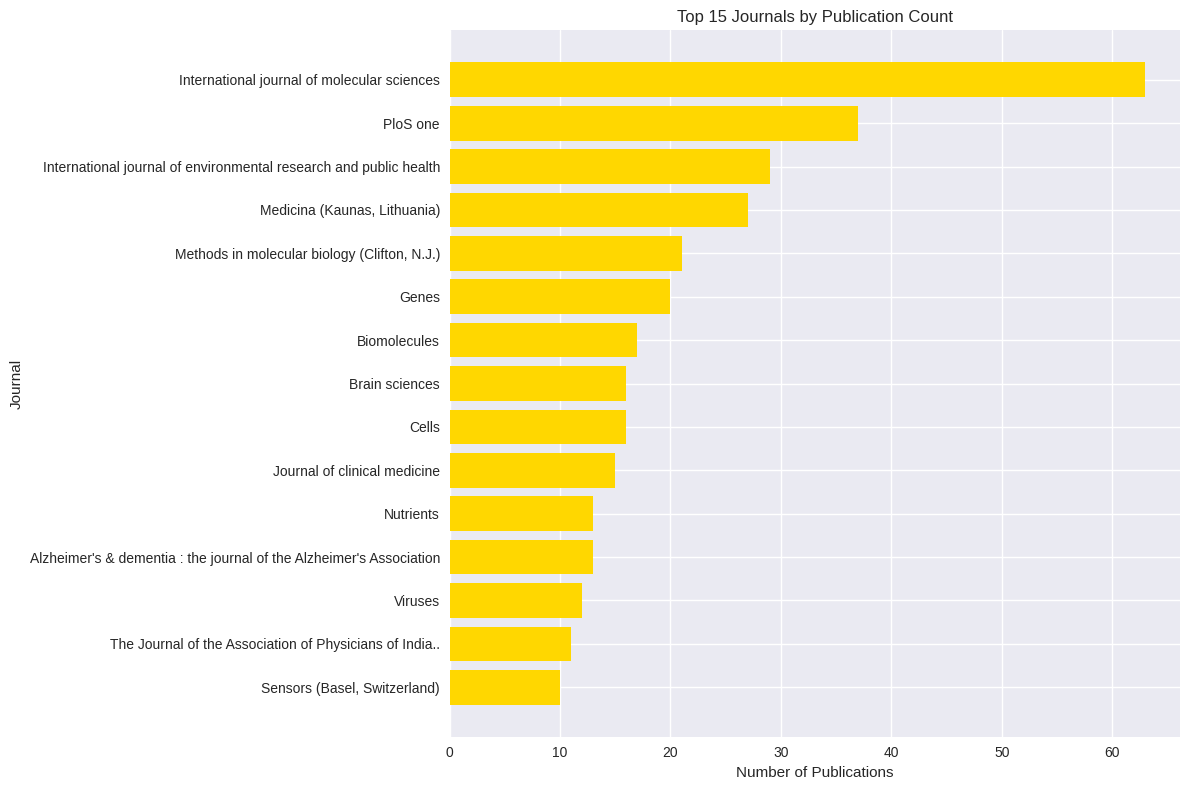


Top 10 Journals:
International journal of molecular sciences: 63
PloS one: 37
International journal of environmental research and public health: 29
Medicina (Kaunas, Lithuania): 27
Methods in molecular biology (Clifton, N.J.): 21
Genes: 20
Biomolecules: 17
Brain sciences: 16
Cells: 16
Journal of clinical medicine: 15


In [138]:
# Analyze top journals
journal_counts = df['Journal'].value_counts().head(15)

plt.figure(figsize=(12, 8))
plt.barh(range(len(journal_counts)), journal_counts.values, color='gold')
plt.yticks(range(len(journal_counts)), journal_counts.index)
plt.title('Top 15 Journals by Publication Count')
plt.xlabel('Number of Publications')
plt.ylabel('Journal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nTop 10 Journals:")
for journal, count in journal_counts.head(10).items():
    print(f"{journal}: {count}")

## 7. Summary and Insights

In [139]:
print("=== DATASET SUMMARY ===")
print(f"Total abstracts: {len(df)}")
print(f"Unique journals: {df['Journal'].nunique()}")
print(f"Year range: {df['Year'].min()} - {df['Year'].max()}")
print(f"Abstracts with categories: {df['Categories'].notna().sum()} ({df['Categories'].notna().sum()/len(df)*100:.1f}%)")
print(f"Abstracts with research types: {df['Research_Type'].notna().sum()} ({df['Research_Type'].notna().sum()/len(df)*100:.1f}%)")
print(f"Abstracts with trial phases: {df['Trial_Phase'].notna().sum()} ({df['Trial_Phase'].notna().sum()/len(df)*100:.1f}%)")

print("\n=== KEY INSIGHTS ===")
print(f"• Average abstract length: {df['Abstract_Length'].mean():.0f} characters")
print(f"• Most common research type: {research_counts.most_common(1)[0][0] if research_counts else 'None'}")
print(f"• Most common disease: {disease_counts.most_common(1)[0][0] if disease_counts else 'None'}")
print(f"• Most common chemical: {chemical_counts.most_common(1)[0][0] if chemical_counts else 'None'}")
print(f"• Most active journal: {journal_counts.index[0] if len(journal_counts) > 0 else 'None'}")

=== DATASET SUMMARY ===
Total abstracts: 982
Unique journals: 403
Year range: 2024 - 2025
Abstracts with categories: 982 (100.0%)
Abstracts with research types: 435 (44.3%)
Abstracts with trial phases: 4 (0.4%)

=== KEY INSIGHTS ===
• Average abstract length: 1669 characters
• Most common research type: review
• Most common disease: depression
• Most common chemical: alcohol
• Most active journal: International journal of molecular sciences
